In [1]:
import sys
sys.path.append("../")
from helper import set_datetime_index, exp_time_data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from datetime import datetime as dt
from datetime import timedelta
from pandas import read_excel, to_datetime, DataFrame
from pandas.plotting import register_matplotlib_converters
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from matplotlib.dates import DateFormatter, MonthLocator
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
import seaborn as sb
import pandas

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (15, 5)
plt.rcParams["axes.unicode_minus"] = False

In [3]:
origin=read_excel('111_지역별승하차.xls')
origin.head()

,일자,행정구역,승차,하차,환승
0,2020년01월01일,가람동,38,43,5
1,2020년01월01일,고운동,997,900,110
2,2020년01월01일,금남면,490,480,28
3,2020년01월01일,나성동,892,765,119
4,2020년01월01일,다정동,175,251,19


In [4]:
origin1 = origin[origin['행정구역'] == '합계']
origin1

,일자,행정구역,승차,하차,환승
22,2020년01월01일,합계,16533,14347,2600
46,2020년01월02일,합계,36164,31159,5652
70,2020년01월03일,합계,38389,32163,6002
94,2020년01월04일,합계,24847,20774,3928
117,2020년01월05일,합계,19212,16882,2970
...,...,...,...,...,...
32973,2023년10월27일,합계,42371,36266,6903
32997,2023년10월28일,합계,28201,24117,4373
33020,2023년10월29일,합계,22385,19654,3588
33043,2023년10월30일,합계,38297,33367,6232


C:\Users\kiman\AppData\Local\Temp\ipykernel_4316\1134019160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  origin1['일자'] = to_datetime(origin1['일자'], format='%Y년%m월%d일')


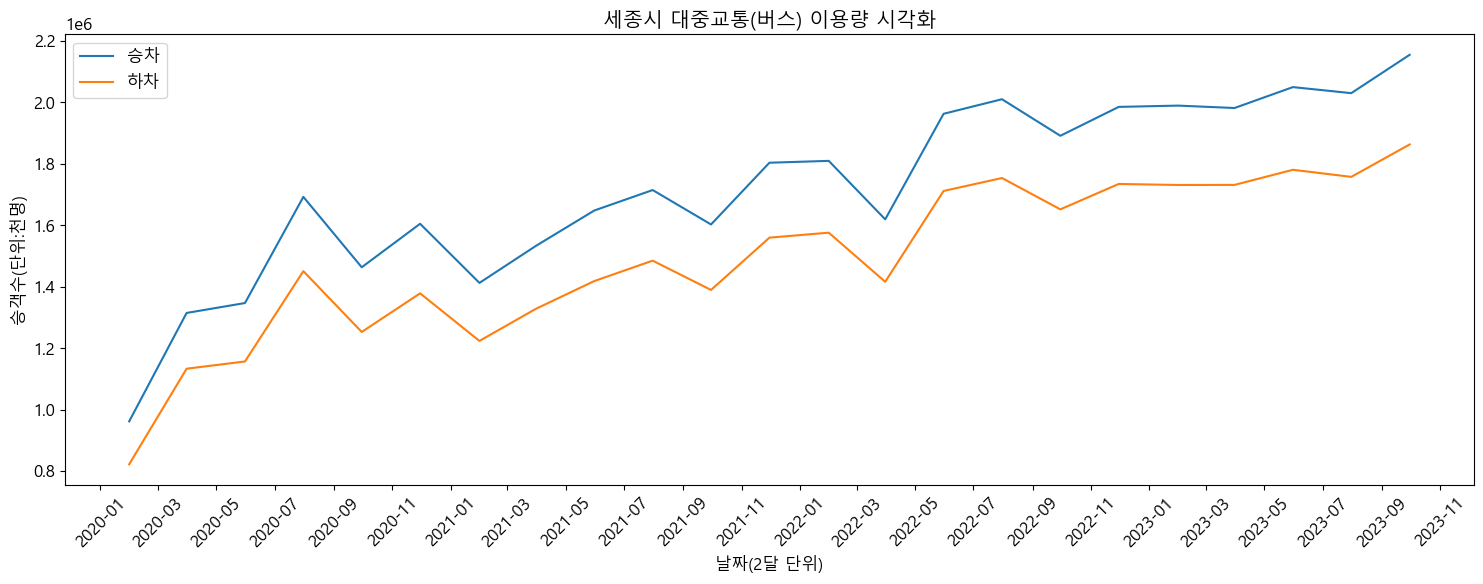

In [15]:
# '일자' 컬럼을 날짜 형식으로 변환합니다.
origin1['일자'] = to_datetime(origin1['일자'], format='%Y년%m월%d일')

# '일자' 컬럼을 기준으로 2달 간격으로 데이터를 묶습니다.
monthly_data = origin1.set_index('일자').resample('2M').sum()

# 23년 11월까지만 데이터를 필터링합니다.
end_date = pandas.Timestamp('2023-11-01')
monthly_data = monthly_data[monthly_data.index <= end_date]

# 그래프 설정
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(monthly_data.index, monthly_data['승차'], label='승차')
ax.plot(monthly_data.index, monthly_data['하차'], label='하차')

# x축에 월간 눈금을 설정합니다.
ax.xaxis.set_major_locator(MonthLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m"))

# 라벨과 범례를 추가합니다.
plt.xlabel("날짜(2달 단위)")
plt.ylabel("승객수(단위:천명)")
plt.title("세종시 대중교통(버스) 이용량 시각화")
plt.xticks(rotation=45)
plt.legend()

# 그래프를 표시합니다.
plt.tight_layout()
plt.show()
plt.close()

In [24]:
origin2=origin1.copy()
origin2
origin2['일자'] = to_datetime(origin1['일자'], format='%Y년%m월%d일')
monthly_data1 = origin2.set_index('일자').resample('2M').sum()
monthly_data2=monthly_data1.drop('행정구역',axis=1)
monthly_data2.head()


,승차,하차,환승
일자,,,
2020-01-31,961363,821695,149889
2020-03-31,1314206,1132754,206651
2020-05-31,1346450,1156286,214242
2020-07-31,1691928,1450171,266734
2020-09-30,1462829,1252355,236477


In [26]:
monthly_data2.to_excel('2달단위_지역별승차.xlsx')

In [65]:
origin3=read_excel('2달단위_지역별승차.xlsx')
origin3.head()

,일자,승차,하차,환승
0,2020-01-31,961363,821695,149889
1,2020-03-31,1314206,1132754,206651
2,2020-05-31,1346450,1156286,214242
3,2020-07-31,1691928,1450171,266734
4,2020-09-30,1462829,1252355,236477


In [66]:
origin4=origin3.filter(['일자','승차'])
origin4

,일자,승차
0,2020-01-31,961363
1,2020-03-31,1314206
2,2020-05-31,1346450
3,2020-07-31,1691928
4,2020-09-30,1462829
5,2020-11-30,1604368
6,2021-01-31,1412000
7,2021-03-31,1532430
8,2021-05-31,1647523
9,2021-07-31,1714138


In [67]:
origin4.dtypes

일자    datetime64[ns]
승차             int64
dtype: object

In [68]:
origin4.set_index('일자',inplace=True)
origin4

,승차
일자,
2020-01-31,961363
2020-03-31,1314206
2020-05-31,1346450
2020-07-31,1691928
2020-09-30,1462829
2020-11-30,1604368
2021-01-31,1412000
2021-03-31,1532430
2021-05-31,1647523


결측치 수: 0


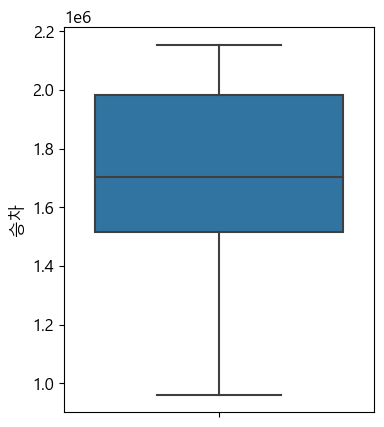

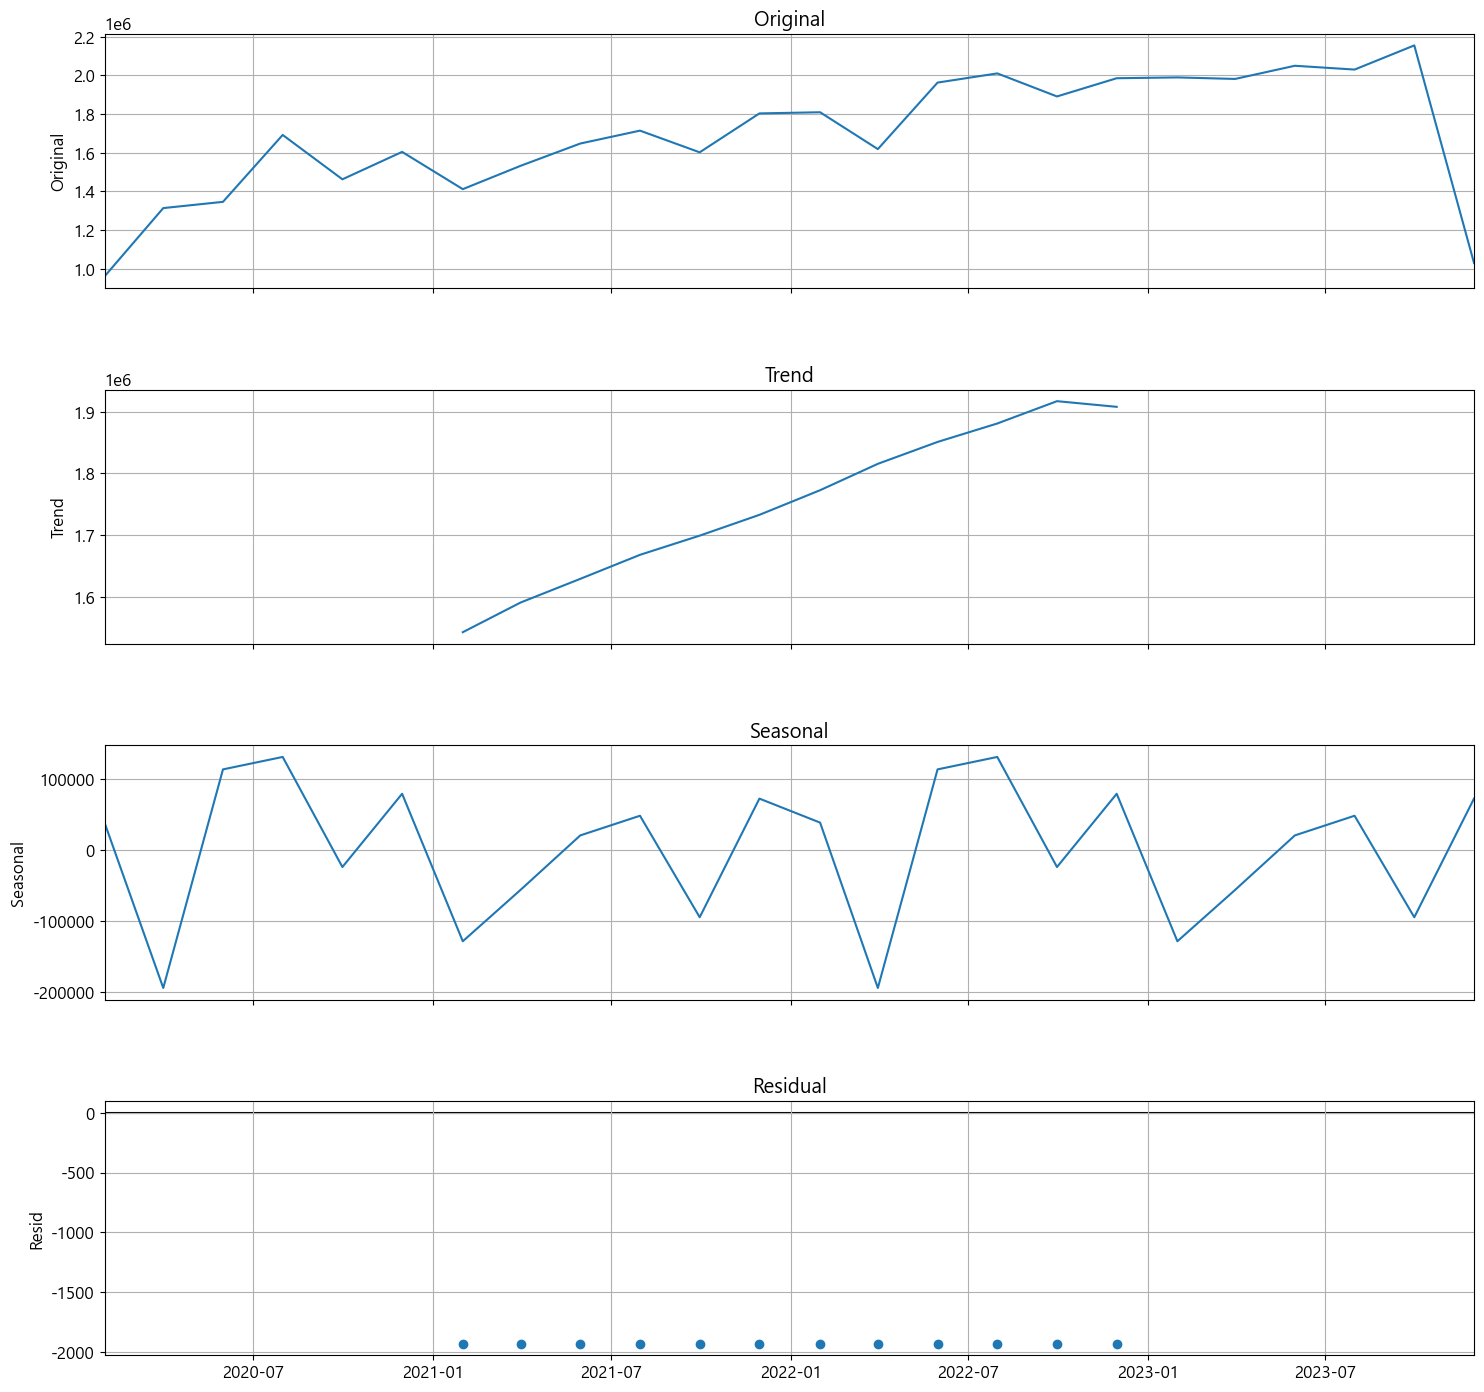

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 14 must be < 12.

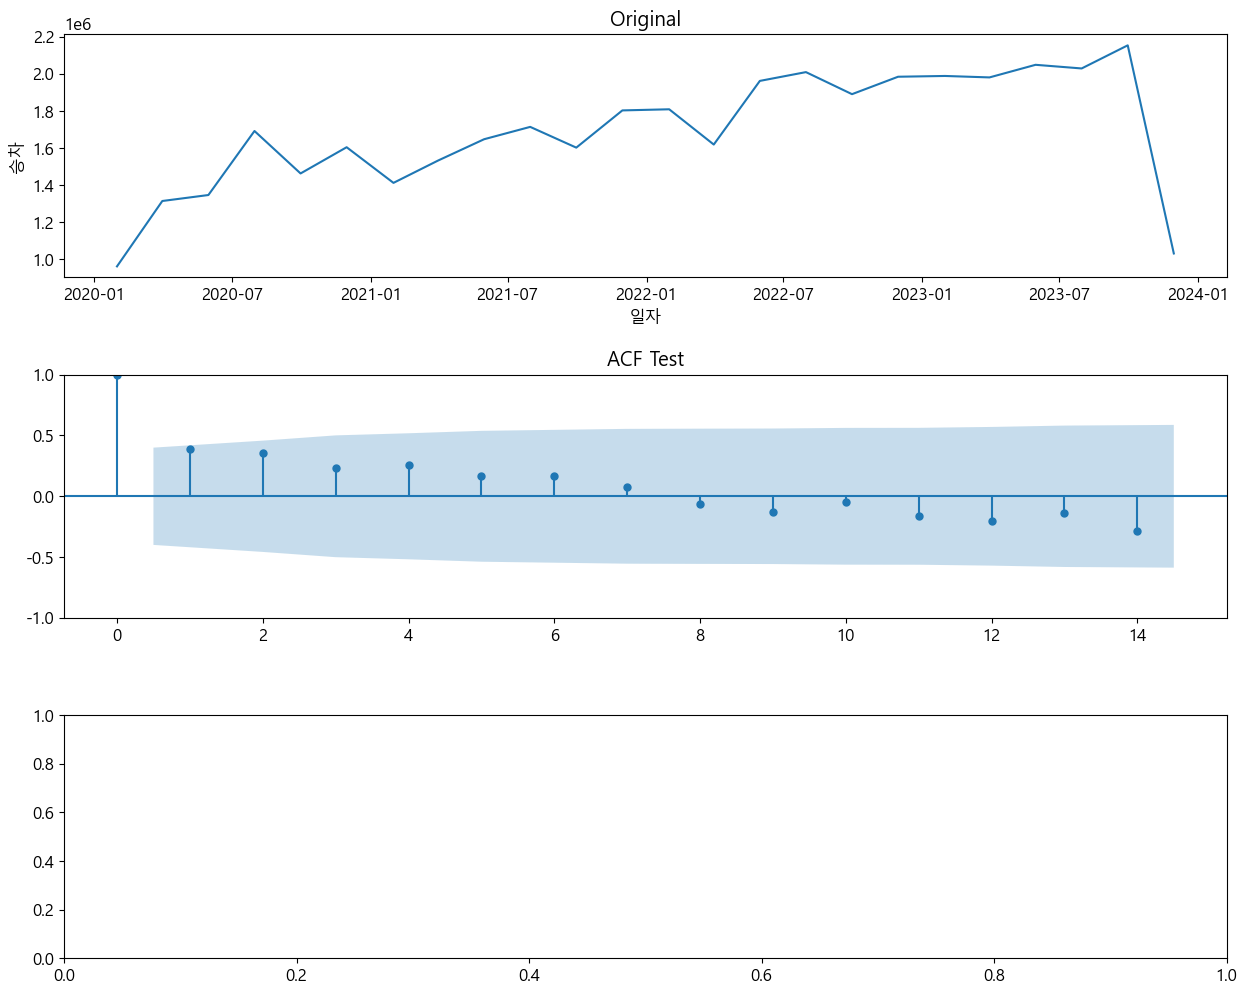

In [62]:
exp_time_data(data=origin4,yname="승차",sd_model='a',max_diff=10)